<a href="https://colab.research.google.com/github/sanek1989/ComfyUI-MultiGPU/blob/main/ComfyUI_%D0%92%D1%81%D0%B5_%D0%B2_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC_%D0%BC%D0%B5%D1%81%D1%82%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Важная информация все нейронки работают в среде выполнение T4

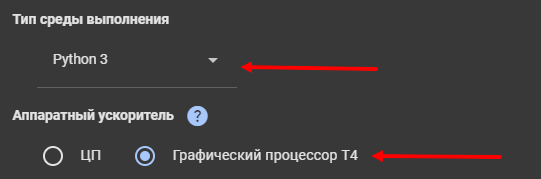
---


### ***Установка ComfyUI где будут работать нейронки***

***Я не рекомендую включать гугл диск оставьти галочки все как есть***

In [ ]:
# @title Установка ComfyUI {"form-width":"390px","display-mode":"form"}
# #@title Environment Setup

print("🏗️ Установка ComfyUI Дождитесь установки...")
from pathlib import Path

OPTIONS = {}

USE_GOOGLE_DRIVE = False  #@param {type:"boolean"}
UPDATE_COMFY_UI = True  #@param {type:"boolean"}
USE_COMFYUI_MANAGER = True  #@param {type:"boolean"}
INSTALL_CUSTOM_NODES_DEPENDENCIES = True  #@param {type:"boolean"}
OPTIONS['USE_GOOGLE_DRIVE'] = USE_GOOGLE_DRIVE
OPTIONS['UPDATE_COMFY_UI'] = UPDATE_COMFY_UI
OPTIONS['USE_COMFYUI_MANAGER'] = USE_COMFYUI_MANAGER
OPTIONS['INSTALL_CUSTOM_NODES_DEPENDENCIES'] = INSTALL_CUSTOM_NODES_DEPENDENCIES

current_dir = !pwd
WORKSPACE = "/content/ComfyUI"

if OPTIONS['USE_GOOGLE_DRIVE']:
    !echo "Mounting Google Drive..."
    %cd /

    from google.colab import drive
    drive.mount('/content/drive')

    WORKSPACE = "/content/drive/MyDrive/ComfyUI"
    %cd /content/drive/MyDrive

![ ! -d $WORKSPACE ] && echo -= Initial setup ComfyUI =- && git clone https://github.com/comfyanonymous/ComfyUI
%cd $WORKSPACE

if OPTIONS['UPDATE_COMFY_UI']:
  !echo -= Updating ComfyUI =-

  # Correction of the issue of permissions being deleted on Google Drive.
  ![ -f ".ci/nightly/update_windows/update_comfyui_and_python_dependencies.bat" ] && chmod 755 .ci/nightly/update_windows/update_comfyui_and_python_dependencies.bat
  ![ -f ".ci/nightly/windows_base_files/run_nvidia_gpu.bat" ] && chmod 755 .ci/nightly/windows_base_files/run_nvidia_gpu.bat
  ![ -f ".ci/update_windows/update_comfyui_and_python_dependencies.bat" ] && chmod 755 .ci/update_windows/update_comfyui_and_python_dependencies.bat
  ![ -f ".ci/update_windows_cu118/update_comfyui_and_python_dependencies.bat" ] && chmod 755 .ci/update_windows_cu118/update_comfyui_and_python_dependencies.bat
  ![ -f ".ci/update_windows/update.py" ] && chmod 755 .ci/update_windows/update.py
  ![ -f ".ci/update_windows/update_comfyui.bat" ] && chmod 755 .ci/update_windows/update_comfyui.bat
  ![ -f ".ci/update_windows/README_VERY_IMPORTANT.txt" ] && chmod 755 .ci/update_windows/README_VERY_IMPORTANT.txt
  ![ -f ".ci/update_windows/run_cpu.bat" ] && chmod 755 .ci/update_windows/run_cpu.bat
  ![ -f ".ci/update_windows/run_nvidia_gpu.bat" ] && chmod 755 .ci/update_windows/run_nvidia_gpu.bat

  !git pull

!echo -= Install dependencies =-
!pip3 install accelerate
!pip3 install einops transformers>=4.28.1 safetensors>=0.4.2 aiohttp pyyaml Pillow scipy tqdm psutil tokenizers>=0.13.3
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip3 install torchsde
!pip3 install kornia>=0.7.1 spandrel soundfile sentencepiece

if OPTIONS['USE_COMFYUI_MANAGER']:
  %cd custom_nodes

  # Correction of the issue of permissions being deleted on Google Drive.
  ![ -f "ComfyUI-Manager/check.sh" ] && chmod 755 ComfyUI-Manager/check.sh
  ![ -f "ComfyUI-Manager/scan.sh" ] && chmod 755 ComfyUI-Manager/scan.sh
  ![ -f "ComfyUI-Manager/node_db/dev/scan.sh" ] && chmod 755 ComfyUI-Manager/node_db/dev/scan.sh
  ![ -f "ComfyUI-Manager/node_db/tutorial/scan.sh" ] && chmod 755 ComfyUI-Manager/node_db/tutorial/scan.sh
  ![ -f "ComfyUI-Manager/scripts/install-comfyui-venv-linux.sh" ] && chmod 755 ComfyUI-Manager/scripts/install-comfyui-venv-linux.sh
  ![ -f "ComfyUI-Manager/scripts/install-comfyui-venv-win.bat" ] && chmod 755 ComfyUI-Manager/scripts/install-comfyui-venv-win.bat

  ![ ! -d ComfyUI-Manager ] && echo -= Initial setup ComfyUI-Manager =- && git clone https://github.com/ltdrdata/ComfyUI-Manager
  %cd ComfyUI-Manager
  !git pull

%cd $WORKSPACE

if OPTIONS['INSTALL_CUSTOM_NODES_DEPENDENCIES']:
  !echo -= Install custom nodes dependencies =-
  !pip install GitPython
  !python custom_nodes/ComfyUI-Manager/cm-cli.py restore-dependencies
clear_output()

print("✅ Установка завершена успешно! Теперь можно выбрать нейросеть для работы")




---


## ***Выберите модель нейросети с которой будите работать и дождитесь установки***

---



***Wan 2.1 нейронка для генерации видео.***

*   [Рабочий процесс](https://vk.com/darina_plush_toys)
*   [Видео инструкция](https://vk.com/darina_plush_toys)




---

In [ ]:
# @title Установка моделей Wan 2.1
#Wan 2.1 Models
print("📦 Загрузка модели VAE...")
!wget -c https://huggingface.co/Comfy-Org/Wan_2.1_ComfyUI_repackaged/resolve/main/split_files/vae/wan_2.1_vae.safetensors -P /content/ComfyUI/models/vae/
clear_output()

print("📦 Загрузка модели Text_Encoders...")
!wget -c https://huggingface.co/Comfy-Org/Wan_2.1_ComfyUI_repackaged/resolve/main/split_files/text_encoders/umt5_xxl_fp8_e4m3fn_scaled.safetensors -P /content/ComfyUI/models/text_encoders
clear_output()

print("📦 Загрузка модели Clip_Vision...")
!wget -c https://huggingface.co/Comfy-Org/Wan_2.1_ComfyUI_repackaged/resolve/main/split_files/clip_vision/clip_vision_h.safetensors -P /content/ComfyUI/models/clip_vision
clear_output()

print("📦 Загрузка модели Diffusion_Models Для генерации текст в видео...")
!wget -c https://huggingface.co/Comfy-Org/Wan_2.1_ComfyUI_repackaged/resolve/main/split_files/diffusion_models/wan2.1_t2v_1.3B_bf16.safetensors -P /content/ComfyUI/models/diffusion_models
clear_output()

print("📦 Загрузка модели Unet (Квантованная модель) Для генерации картинка в видео...")
!wget -c https://huggingface.co/city96/Wan2.1-I2V-14B-480P-gguf/resolve/main/wan2.1-i2v-14b-480p-Q3_K_M.gguf -P /content/ComfyUI/models/unet
clear_output()

print("😇😇😇 Загрузка модели успешна завершена теперь можно Запустить WEB интерфейс...")



---


# ***Запуск ComfyUI***


---


### ***Запуск ComfyUI через cloudflared (Рекомендуемый способ)***




In [ ]:
#!cd "/content/ComfyUI"

In [ ]:
!cd "/content/ComfyUI"

!wget -P ~ https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i ~/cloudflared-linux-amd64.deb

import subprocess
import threading
import time
import socket
import urllib.request

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch cloudflared (if it gets stuck here cloudflared is having issues)\n")

  p = subprocess.Popen(["cloudflared", "tunnel", "--url", "http://127.0.0.1:{}".format(port)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  for line in p.stderr:
    l = line.decode()
    if "trycloudflare.com " in l:
      print("👍👍👍Вот ваша ссылка к веб интерфейсу ComfyUI клик на неё👉👉👉:", l[l.find("http"):], end='')
    #print(l, end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python /content/ComfyUI/main.py --dont-print-server



---


### ***2 способ если 1 не будет работать Run ComfyUI with localtunnel***

In [ ]:
!npm install -g localtunnel

import subprocess
import threading
import time
import socket
import urllib.request

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch localtunnel (if it gets stuck here localtunnel is having issues)\n")

  print("The password/enpoint ip for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
  p = subprocess.Popen(["lt", "--port", "{}".format(port)], stdout=subprocess.PIPE)
  for line in p.stdout:
    print(line.decode(), end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python /content/ComfyUI/main.py --dont-print-server